<a href="https://colab.research.google.com/github/yuhui-0611/ESAA/blob/main/ESAA_YB_WEEK03_Datetime.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **12-1**

# **datetime 오브젝트**
- datetime 라이브러리는 날짜와 시간을 처리하는 등의 다양한 기능 제공
- 날짜를 처리하는 date 오브젝트, 시간을 처리하는 time 오브젝트, 날짜와 시간 모두 처리하는 datetime 오브젝트가 포함되어 있음

**datetime 오브젝트 사용하기**

1. datetime 오브젝트 사용을 위한 라이브러리 불러오기

In [71]:
from datetime import datetime

2. now, today 메서드를 사용하면 아래와 같이 현재 시간 출력 가능

In [72]:
now1 = datetime.now()
print(now1)

now2 = datetime.today()
print(now2)

2025-09-21 17:01:12.829808
2025-09-21 17:01:12.830182


3. 아래는 datetime 오브젝트를 생성할 때 시간을 직접 입력해 인자로 전달한 것으로 입력한 시간을 바탕으로 datetime 오브젝트 생성

In [73]:
t1 = datetime.now()
t2 = datetime(1970, 1, 1)
t3 = datetime(1970, 12, 12, 13, 24, 34)

print(t1)
print(t2)
print(t3)

2025-09-21 17:01:12.837748
1970-01-01 00:00:00
1970-12-12 13:24:34


4. datetime 오브젝트를 사용하는 이유 중 하나는 시간 계산이 가능하다는 점

In [74]:
diff1 = t1 - t2

print(diff1)
print(type(diff1))

diff2 = t2 - t1

print(diff2)
print(type(diff2))

20352 days, 17:01:12.837748
<class 'datetime.timedelta'>
-20353 days, 6:58:47.162252
<class 'datetime.timedelta'>


**< datetime 오브젝트로 변환하기 - to_datetime 메서드 >**

- 시계열 데이터를 문자열로 저장해야할 때도 있음
- 하지만 문자열은 시간 계산이 불가능하기에 datetime 오브젝트로 변환해주어야 함

**문자열을 datetime 오브젝트로 변환하기**

1. ebola 데이터 집합 불러오기

In [75]:
import pandas as pd
import os

In [76]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [77]:
ebola = pd.read_csv('/content/drive/MyDrive/ESAA_datetime/country_timeseries.csv')

2. ebola 데이터프레임을 보면 문자열로 저장된 Date 열이 있는 것을 알 수 있음

In [78]:
ebola.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date                 122 non-null    object 
 1   Day                  122 non-null    int64  
 2   Cases_Guinea         93 non-null     float64
 3   Cases_Liberia        83 non-null     float64
 4   Cases_SierraLeone    87 non-null     float64
 5   Cases_Nigeria        38 non-null     float64
 6   Cases_Senegal        25 non-null     float64
 7   Cases_UnitedStates   18 non-null     float64
 8   Cases_Spain          16 non-null     float64
 9   Cases_Mali           12 non-null     float64
 10  Deaths_Guinea        92 non-null     float64
 11  Deaths_Liberia       81 non-null     float64
 12  Deaths_SierraLeone   87 non-null     float64
 13  Deaths_Nigeria       38 non-null     float64
 14  Deaths_Senegal       22 non-null     float64
 15  Deaths_UnitedStates  18 non-null     flo

3. to_datetime 메서드를 사용하면 Date 열의 자료형을 datetime 오브젝트로 변환 가능
- 아래는 to_datetime 메서드를 사용하여 Date 열의 자료형을 datetime 오브젝트로 변환한 다음 ebola 데이터프레임에 새로운 열로 추가한 것

In [79]:
ebola['data_dt'] = pd.to_datetime(ebola['Date'])
print(ebola.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 122 non-null    object        
 1   Day                  122 non-null    int64         
 2   Cases_Guinea         93 non-null     float64       
 3   Cases_Liberia        83 non-null     float64       
 4   Cases_SierraLeone    87 non-null     float64       
 5   Cases_Nigeria        38 non-null     float64       
 6   Cases_Senegal        25 non-null     float64       
 7   Cases_UnitedStates   18 non-null     float64       
 8   Cases_Spain          16 non-null     float64       
 9   Cases_Mali           12 non-null     float64       
 10  Deaths_Guinea        92 non-null     float64       
 11  Deaths_Liberia       81 non-null     float64       
 12  Deaths_SierraLeone   87 non-null     float64       
 13  Deaths_Nigeria       38 non-null   

4. 시간 형식 지정자(%d, %m, %y)와 기호(/, -)를 적절히 조합하여 format 인자에 전달하면 그 형식에 맞게 정리된 datetime 오브젝트를 얻을 수 있음

In [80]:
test_df1 = pd.DataFrame({'order_day': ['01/01/15', '02/01/15', '03/01/15']})
print(test_df1)

test_df1['date_dt1'] = pd.to_datetime(test_df1['order_day'], format='%d/%m/%y')
test_df1['date_dt2'] = pd.to_datetime(test_df1['order_day'], format='%m/%d/%y')
test_df1['date_dt3'] = pd.to_datetime(test_df1['order_day'], format='%y/%m/%d')

print(test_df1)

  order_day
0  01/01/15
1  02/01/15
2  03/01/15
  order_day   date_dt1   date_dt2   date_dt3
0  01/01/15 2015-01-01 2015-01-01 2001-01-15
1  02/01/15 2015-01-02 2015-02-01 2002-01-15
2  03/01/15 2015-01-03 2015-03-01 2003-01-15


In [81]:
test_df2 = pd.DataFrame({'order_day': ['01-01-15', '02-01-15', '03-01-15']})
print(test_df2)

test_df2['date_dt2'] = pd.to_datetime(test_df2['order_day'], format='%d-%m-%y')
print(test_df2)

  order_day
0  01-01-15
1  02-01-15
2  03-01-15
  order_day   date_dt2
0  01-01-15 2015-01-01
1  02-01-15 2015-01-02
2  03-01-15 2015-01-03


**시간 형식 지정자**

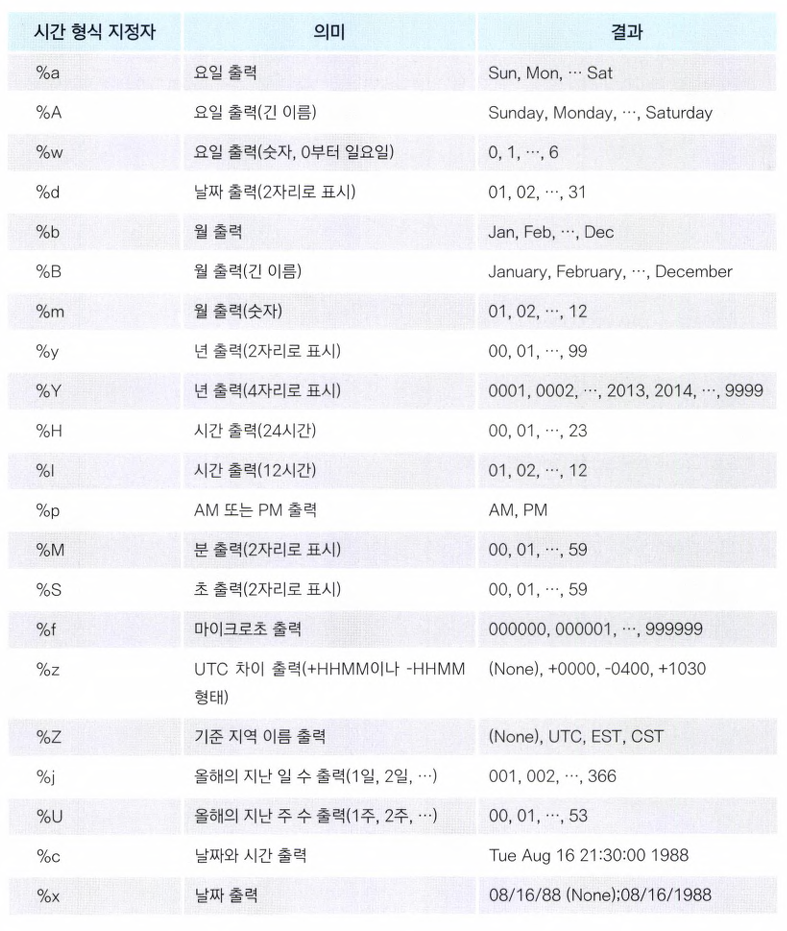

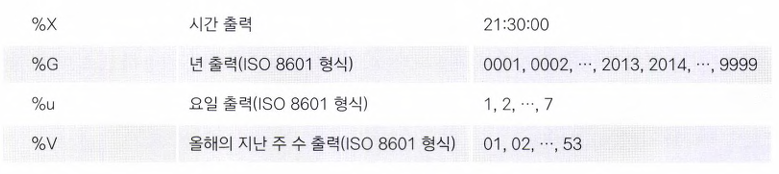

**+ 시계열 데이터 구분해서 추출**
- now 메서드로 얻은 현재 시간의 시계열 데이터는 매우 정밀한 단위까지 시간 표현
- 하지만 원하는 시계열 데이터의 시간 요소가 연도, 월, 일뿐이라면 now 메서드로 얻은 시계열 데이터를 잘라내야 함
- 아래는 strftime 메서드와 시간 형식 지정자를 이용해 시계열 데이터를 잘라낸 것

In [82]:
now = datetime.now()
print(now)

nowDate = now.strftime('%y-%m-%d')
print(nowDate)

nowTime = now.strftime('%H:%M:%S')
print(nowTime)

nowDateTime = now.strftime('%y-%m-%d %H:%M:%S')
print(nowDateTime)

2025-09-21 17:01:14.422008
25-09-21
17:01:14
25-09-21 17:01:14


**< datetime 오브젝트로 변환하기 - read_csv >**

- 앞에서는 to_datetime 메서드를 이용해 문자열로 저장되어 있는 Date 열을 datetime 오브젝트로 변환함
- 하지만 datetime 오브젝트로 변환하려는 열을 "지정"해 데이터를 물러오는 것이 더 간단함

**datetime 오브젝트로 변환하려는 열을 지정하여 데이터 불러오기**

1. 다음은 read_csv 메서드의 parse_dates 인자에 datetime 오브젝트로 변환하고자 하는 열의 이름을 전달해 데이터 집합을 불러온 것
- 결과를 보면 Date 열이 문자열이 아니라 datetime 오브젝트인 것 확인 가능

In [83]:
ebola1 = pd.read_csv('/content/drive/MyDrive/ESAA_datetime/country_timeseries.csv', parse_dates=['Date'])
print(ebola1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 122 non-null    datetime64[ns]
 1   Day                  122 non-null    int64         
 2   Cases_Guinea         93 non-null     float64       
 3   Cases_Liberia        83 non-null     float64       
 4   Cases_SierraLeone    87 non-null     float64       
 5   Cases_Nigeria        38 non-null     float64       
 6   Cases_Senegal        25 non-null     float64       
 7   Cases_UnitedStates   18 non-null     float64       
 8   Cases_Spain          16 non-null     float64       
 9   Cases_Mali           12 non-null     float64       
 10  Deaths_Guinea        92 non-null     float64       
 11  Deaths_Liberia       81 non-null     float64       
 12  Deaths_SierraLeone   87 non-null     float64       
 13  Deaths_Nigeria       38 non-null   

**< datetime 오브젝트에서 날짜 정보 추출하기 >**

- datetime 오브젝트에는 년, 월, 일과 같은 날자 정보를 따로 저장하고 있는 속성이 이미 준비되어 있음

1. 문자열로 저장된 날짜를 시리즈에 담아 datetime 오브젝트로 변환

In [84]:
date_series = pd.Series(['2018-05-16', '2018-05-17', '2018-05-18'])
# Series = 값과 인덱스를 함께 가지는 객체 / 엑셀의 한 column으로 생각하면 됨
print(date_series)
d1 = pd.to_datetime(date_series)
print(d1)

0    2018-05-16
1    2018-05-17
2    2018-05-18
dtype: object
0   2018-05-16
1   2018-05-17
2   2018-05-18
dtype: datetime64[ns]


2. datetime 오브젝트(d1)의 year, month, day 속성을 이용하면 년, 월, 일 정보 바로 추출 가능

In [85]:
print(d1[0].year)
print(d1[0].month)
print(d1[0].day)

2018
5
16


**< dt 접근자 사용하기 >**

- 문자열을 처리하려면 str 접근자를 사용한 다음 문자열 속성이나 메서드를 사용해야 했음
- datetime 오브젝트도 마찬가지로 dt 접근자를 사용하면 datetime 속성이나 메서드를 사용하여 시계열 데이터 처리 가능

**dt 접근자로 시계열 데이터 정리하기**

1. ebola의 Date 열을 datetime 오브젝트로 변환하여 새로운 열(date_dt)로 추가

In [86]:
ebola['date_dt'] = pd.to_datetime(ebola['Date'])

2. dt 접근자를 사용하지 않고 인덱스가 3인 데이터의 년, 월, 일 데이터 추출

In [87]:
print(ebola[['Date', 'date_dt']].head())

         Date    date_dt
0    1/5/2015 2015-01-05
1    1/4/2015 2015-01-04
2    1/3/2015 2015-01-03
3    1/2/2015 2015-01-02
4  12/31/2014 2014-12-31


In [88]:
print(ebola['date_dt'][3].year)
print(ebola['date_dt'][3].month)
print(ebola['date_dt'][3].day)

2015
1
2


3. 과정 2번과 같은 방법은 date_dt 열의 특정 데이터를 인덱스로 접근해야 하기 때문에 불편
- 아래는 dt 접근자로 date_dt 열에 한 번에 접근한 다음 year 속성을 이용해 연도값 추출한 것
- 추출한 연도 값은 ebola 데이터프레임의 새로운 열(year)로 추가

In [89]:
ebola['year'] = ebola['date_dt'].dt.year
print(ebola['year'])
print(ebola[['Date', 'date_dt', 'year']].head())

0      2015
1      2015
2      2015
3      2015
4      2014
       ... 
117    2014
118    2014
119    2014
120    2014
121    2014
Name: year, Length: 122, dtype: int32
         Date    date_dt  year
0    1/5/2015 2015-01-05  2015
1    1/4/2015 2015-01-04  2015
2    1/3/2015 2015-01-03  2015
3    1/2/2015 2015-01-02  2015
4  12/31/2014 2014-12-31  2014


4. 과정 3을 응용해 월, 일 데이터를 한번에 추출해 새로운 열(month, day)로 추가

In [90]:
ebola['month'], ebola['day'] = (ebola['date_dt'].dt.month, ebola['date_dt'].dt.day)
print(ebola[['Date', 'date_dt', 'year', 'month', 'day']].head())

         Date    date_dt  year  month  day
0    1/5/2015 2015-01-05  2015      1    5
1    1/4/2015 2015-01-04  2015      1    4
2    1/3/2015 2015-01-03  2015      1    3
3    1/2/2015 2015-01-02  2015      1    2
4  12/31/2014 2014-12-31  2014     12   31


5. 아래는 ebola 데이터프레임에 새로 추가한 date_dt, year, month, day 열의 자료형 출력한 것
- date_dt 열은 datetime 오브젝트이고 나머지는 정수형이라는 것을 알 수 있음

In [91]:
print(ebola.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 122 non-null    object        
 1   Day                  122 non-null    int64         
 2   Cases_Guinea         93 non-null     float64       
 3   Cases_Liberia        83 non-null     float64       
 4   Cases_SierraLeone    87 non-null     float64       
 5   Cases_Nigeria        38 non-null     float64       
 6   Cases_Senegal        25 non-null     float64       
 7   Cases_UnitedStates   18 non-null     float64       
 8   Cases_Spain          16 non-null     float64       
 9   Cases_Mali           12 non-null     float64       
 10  Deaths_Guinea        92 non-null     float64       
 11  Deaths_Liberia       81 non-null     float64       
 12  Deaths_SierraLeone   87 non-null     float64       
 13  Deaths_Nigeria       38 non-null   

# **12-2**

# **사례별 시계열 데이터 계산하기**

**에볼라 최초 발병일 계산하기**

1. ebola 데이터프레임의 마지막 행과 열을 5개씩 살펴봄
- ebola 데이터프레임은 시간 역순으로 설정되어 있음
- 즉, 시간 순으로 데이터를 살펴보려면 데이터프레임의 마지막부터 살펴봐야 함

In [92]:
print(ebola.iloc[-5:, :5])

          Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone
117  3/27/2014    5         103.0            8.0                6.0
118  3/26/2014    4          86.0            NaN                NaN
119  3/25/2014    3          86.0            NaN                NaN
120  3/24/2014    2          86.0            NaN                NaN
121  3/22/2014    0          49.0            NaN                NaN


- 121행에서 볼 수 있듯이 에볼라가 발생하기 시작한 날은 2014년 03월 22일
2. 다음은 min 메서드를 사용해 에볼라의 최초 발병일을 찾은 것

In [93]:
print(ebola['date_dt'].min())
print(type(ebola['date_dt'].min()))

2014-03-22 00:00:00
<class 'pandas._libs.tslibs.timestamps.Timestamp'>


3. Date 열에서 에볼라의 최초 발병일을 빼면 에볼라의 진행 정도를 알 수 있음

In [94]:
ebola['outbreak_d'] = ebola['date_dt'] - ebola['date_dt'].min()
print(ebola[['Date', 'Day', 'outbreak_d']].head())

         Date  Day outbreak_d
0    1/5/2015  289   289 days
1    1/4/2015  288   288 days
2    1/3/2015  287   287 days
3    1/2/2015  286   286 days
4  12/31/2014  284   284 days


**파산한 은행의 개수 계산하기**
- 파산한 은행 데이터를 불러와 분기별로 파산한 은행이 얼마나 되는지 계산
- 그래프로 시각화

1. 파산한 은행 데이터 집합을 불러온 것
- banks 데이터프레임의 앞부분을 살펴보면 Closing Date, Updated Date 열의 데이터 자료형이 시계열 데이터라는 것을 알 수 있음

In [95]:
banks = pd.read_csv('/content/drive/MyDrive/ESAA_datetime/banklist.csv')
print(banks.head())

                                           Bank Name                City  ST  \
0                                Fayette County Bank          Saint Elmo  IL   
1  Guaranty Bank, (d/b/a BestBank in Georgia & Mi...           Milwaukee  WI   
2                                     First NBC Bank         New Orleans  LA   
3                                      Proficio Bank  Cottonwood Heights  UT   
4                      Seaway Bank and Trust Company             Chicago  IL   

    CERT                Acquiring Institution Closing Date Updated Date  
0   1802            United Fidelity Bank, fsb    26-May-17    26-Jul-17  
1  30003  First-Citizens Bank & Trust Company     5-May-17    26-Jul-17  
2  58302                         Whitney Bank    28-Apr-17    26-Jul-17  
3  35495                    Cache Valley Bank     3-Mar-17    18-May-17  
4  19328                  State Bank of Texas    27-Jan-17    18-May-17  


- Closing Date, Updated Date 열의 데이터 자료형은 문자열
2. 아래는 read_csv 메서드의 parse_dates 속성을 이용해 문자열로 저장된 두 열을 datetime 오브젝트로 변환하여 불러온 것

In [96]:
banks_no_dates = pd.read_csv('/content/drive/MyDrive/ESAA_datetime/banklist.csv')
print(banks_no_dates.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 553 entries, 0 to 552
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Bank Name              553 non-null    object
 1   City                   553 non-null    object
 2   ST                     553 non-null    object
 3   CERT                   553 non-null    int64 
 4   Acquiring Institution  553 non-null    object
 5   Closing Date           553 non-null    object
 6   Updated Date           553 non-null    object
dtypes: int64(1), object(6)
memory usage: 30.4+ KB
None


In [97]:
# parse_dates는 날짜/시간 데이터를 분석하기 좋게 자동 변환하는 옵션
# 특정 "열" 단위를 날짜 형식으로 바꿔주는 기능
banks = pd.read_csv('/content/drive/MyDrive/ESAA_datetime/banklist.csv', parse_dates=[5,6])
banks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 553 entries, 0 to 552
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Bank Name              553 non-null    object        
 1   City                   553 non-null    object        
 2   ST                     553 non-null    object        
 3   CERT                   553 non-null    int64         
 4   Acquiring Institution  553 non-null    object        
 5   Closing Date           553 non-null    datetime64[ns]
 6   Updated Date           553 non-null    datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 30.4+ KB


/tmp/ipython-input-3081822260.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  banks = pd.read_csv('/content/drive/MyDrive/ESAA_datetime/banklist.csv', parse_dates=[5,6])
/tmp/ipython-input-3081822260.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  banks = pd.read_csv('/content/drive/MyDrive/ESAA_datetime/banklist.csv', parse_dates=[5,6])


3. dt 접근자와 quarter 속성을 이용하면 은행이 파산한 분기를 알 수 있음
- 아래는 dt 접근자와 year, quarter 속성을 이용하여 은행이 파산한 연도, 분기를 새로운 열로 추가한 것

In [98]:
banks['closing_quarter'], banks['closing_year'] = (banks['Closing Date'].dt.quarter, banks['Closing Date'].dt.year)
banks.head()

,Bank Name,City,ST,CERT,Acquiring Institution,Closing Date,Updated Date,closing_quarter,closing_year
0,Fayette County Bank,Saint Elmo,IL,1802,"United Fidelity Bank, fsb",2017-05-26,2017-07-26,2,2017
1,"Guaranty Bank, (d/b/a BestBank in Georgia & Mi...",Milwaukee,WI,30003,First-Citizens Bank & Trust Company,2017-05-05,2017-07-26,2,2017
2,First NBC Bank,New Orleans,LA,58302,Whitney Bank,2017-04-28,2017-07-26,2,2017
3,Proficio Bank,Cottonwood Heights,UT,35495,Cache Valley Bank,2017-03-03,2017-05-18,1,2017
4,Seaway Bank and Trust Company,Chicago,IL,19328,State Bank of Texas,2017-01-27,2017-05-18,1,2017


4. 연도별로 파산한 은행이 얼마나 되는지를 groupby 메서드를 사용해 파산한 은행의 개수 구하기

In [99]:
closing_year = banks.groupby(['closing_year']).size()
closing_year

,0
closing_year,
2000,2
2001,4
2002,11
2003,3
2004,4
2007,3
2008,25
2009,140
2010,157


5. 각 연도, 분기별로 파산한 은행의 개수 : 아래는 banks 데이터프레임을 연도별로 그룹화한 다음 다시 분기별로 그룹화하여 출력한 것

In [100]:
closing_year_q = banks.groupby(['closing_year', 'closing_quarter']).size()
closing_year_q

closing_year  closing_quarter
2000          4                   2
2001          1                   1
              2                   1
              3                   2
2002          1                   6
              2                   2
              3                   1
              4                   2
2003          1                   1
              2                   1
              4                   1
2004          1                   3
              2                   1
2007          1                   1
              3                   1
              4                   1
2008          1                   2
              2                   2
              3                   9
              4                  12
2009          1                  21
              2                  24
              3                  50
              4                  45
2010          1                  41
              2                  45
              3                  41
              4                  30
2011          1                  26
              2                  22
              3                  26
              4                  18
2012          1                  16
              2                  15
              3                  12
              4                   8
2013          1                   4
              2                  12
              3                   6
              4                   2
2014          1                   5
              2                   7
              3                   2
              4                   4
2015          1                   4
              2                   1
              3                   1
              4                   2
2016          1                   1
              2                   2
              3                   2
2017          1                   3
              2                   3
dtype: int64

6. 5 시각화

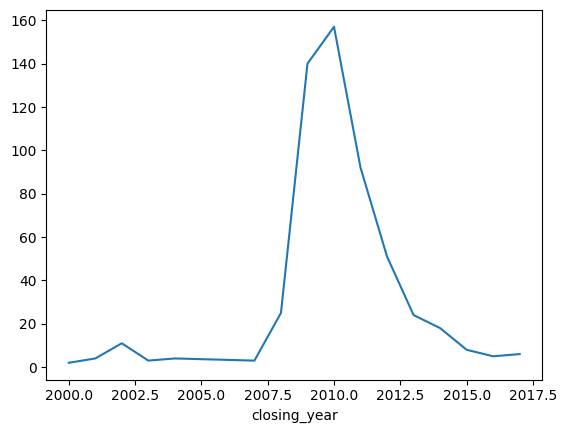

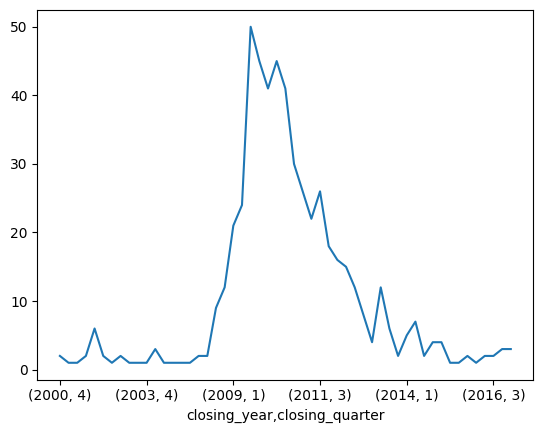

In [101]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax = closing_year.plot()
plt.show()

fig, ax = plt.subplots()
ax = closing_year_q.plot()
plt.show()

**테슬라 주식 데이터로 시간 계산하기**
- pandas_datareader 라이브러리를 이용해 주식 데이터 불러오기

In [102]:
pip install pandas-datareader

1. 다음은 get_data_quanal 메서드에 TSLA라는 문자열을 전달하여 테슬라의 주식 데이터를 내려 받은 다음, to_csv 메서드룰 사용하여 data 폴더 안에 'tesIa_stock_quandl.csv'라는 이름으로 저장한 것

In [103]:
pd.core.common.is_list_like = pd.api.types.is_list_like
import pandas_datareader as pdr

# 옛날 코드 호환성 문제를 해결하기 위한 패치
# 즉, pandas_datareader 같은 라이브러리가 아직도 pd.core.common.is_list_like를 호출할 수 있는데,
# 최신 pandas에는 그게 없어서 실행 시 오류가 남
# 그래서 임시로 pd.core.common.is_list_like 이름을 pd.api.types.is_list_like 함수에 연결시켜주는 것

In [104]:
# tesla에는 데이터 프레임이 저장됨
# tesla = pdr.get_data_quandl('TSLA', api_key = '받은 key')

# tesla에 저장된 데이터 프레임을 파일로 저장
# tesla.to_csv('../data/tesla_stock_quandl.csv')

tesla = pd.read_csv('/content/drive/MyDrive/ESAA_datetime/tesla_stock_quandl.csv')

2. tesla 데이터프레임의 Date 열은 문자열로 저장되어 있기에 datetime 오브젝트로 자료형을 변환해야 시간 계산 가능

In [105]:
tesla.head()

,Date,Open,High,Low,Close,Volume,ExDividend,SplitRatio,AdjOpen,AdjHigh,AdjLow,AdjClose,AdjVolume
0,2018-03-27,304.00,304.27,277.18,279.18,13696168.0,0.0,1.0,304.00,304.27,277.18,279.18,13696168.0
1,2018-03-26,307.34,307.59,291.36,304.18,8324639.0,0.0,1.0,307.34,307.59,291.36,304.18,8324639.0
2,2018-03-23,311.25,311.61,300.45,301.54,6600538.0,0.0,1.0,311.25,311.61,300.45,301.54,6600538.0
3,2018-03-22,313.89,318.82,308.18,309.10,4914307.0,0.0,1.0,313.89,318.82,308.18,309.10,4914307.0
4,2018-03-21,310.25,322.44,310.19,316.53,5927881.0,0.0,1.0,310.25,322.44,310.19,316.53,5927881.0


3. 이를 datetime 형으로 변환하려면 read_csv 메서드로 데이터 집합을 불러올 때, parse_dates 인자에 Date 열을 전달하면 됨

In [106]:
tesla = pd.read_csv('/content/drive/MyDrive/ESAA_datetime/tesla_stock_quandl.csv', parse_dates=[0])
tesla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1949 entries, 0 to 1948
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        1949 non-null   datetime64[ns]
 1   Open        1949 non-null   float64       
 2   High        1949 non-null   float64       
 3   Low         1949 non-null   float64       
 4   Close       1949 non-null   float64       
 5   Volume      1949 non-null   float64       
 6   ExDividend  1949 non-null   float64       
 7   SplitRatio  1949 non-null   float64       
 8   AdjOpen     1949 non-null   float64       
 9   AdjHigh     1949 non-null   float64       
 10  AdjLow      1949 non-null   float64       
 11  AdjClose    1949 non-null   float64       
 12  AdjVolume   1949 non-null   float64       
dtypes: datetime64[ns](1), float64(12)
memory usage: 198.1 KB


4. Date 열의 자료형이 datetime 오브젝트로 변환되었기에, 이제 dt 접근자를 사용해 불린 추출로 2010년 6월의 데이터만 추출

In [107]:
tesla.loc[(tesla.Date.dt.year == 2010) & (tesla.Date.dt.month == 6)]

,Date,Open,High,Low,Close,Volume,ExDividend,SplitRatio,AdjOpen,AdjHigh,AdjLow,AdjClose,AdjVolume
1947,2010-06-30,25.79,30.4192,23.30,23.83,17187100.0,0.0,1.0,25.79,30.4192,23.30,23.83,17187100.0
1948,2010-06-29,19.00,25.0000,17.54,23.89,18766300.0,0.0,1.0,19.00,25.0000,17.54,23.89,18766300.0


**< datetime 오브젝트와 인덱스 - DatetimeIndex >**

- datetime 오브젝트를 데이터프레임의 인덱스로 설정하면 원하는 시간의 데이터를 바로 추출할 수 있어 편리함
- index_col="열 이름" → 파일을 읽을 때부터 그 열을 인덱스로 설정하고, 열에서는 제거됨
- df.index = df['열 이름'] → 읽은 뒤 지정, 하지만 원래 열은 남아 있어서 중복됨

**datetime 오브젝트를 인덱스로 설정해 데이터 추출하기**

1. 아래는 Date 열을 tesla 데이터프레임의 인덱스로 지정한 것

In [108]:
tesla.index = tesla['Date']
tesla.index

DatetimeIndex(['2018-03-27', '2018-03-26', '2018-03-23', '2018-03-22',
               '2018-03-21', '2018-03-20', '2018-03-19', '2018-03-16',
               '2018-03-15', '2018-03-14',
               ...
               '2010-07-13', '2010-07-12', '2010-07-09', '2010-07-08',
               '2010-07-07', '2010-07-06', '2010-07-02', '2010-07-01',
               '2010-06-30', '2010-06-29'],
              dtype='datetime64[ns]', name='Date', length=1949, freq=None)

2. datetime 오브젝트를 인덱스로 지정하면 원하는 시간의 데이터 바로 추출 가능

In [109]:
tesla.loc['2015'].iloc[:5,:5]

,Date,Open,High,Low,Close
Date,,,,,
2015-12-31,2015-12-31,238.51,243.450,238.3700,240.01
2015-12-30,2015-12-30,236.60,243.634,235.6707,238.09
2015-12-29,2015-12-29,230.06,237.720,229.5470,237.19
2015-12-28,2015-12-28,231.49,231.980,225.5400,228.95
2015-12-24,2015-12-24,230.56,231.880,228.2800,230.57


In [110]:
tesla.loc['2010-06'].iloc[:,:5]

,Date,Open,High,Low,Close
Date,,,,,
2010-06-30,2010-06-30,25.79,30.4192,23.30,23.83
2010-06-29,2010-06-29,19.00,25.0000,17.54,23.89


**< 시간 간격과 인덱스 - TimedeltaIndex >**

- 주식 데이터에서 최초 5일간 수집된 데이터만 살펴보고 싶다면 어떻게 해야할까?
- 이러한 경우에는 시간 간격을 인덱스로 지정해 데이터를 추출하면 됨
- 이번에는 datetime 오브젝트 말고, 시간 간격을 인덱스로 지정해 진행

**시간 간격을 인덱스로 지정해 데이터 추출하기**

1. Date 열에서 Date 열의 최솟값(2010-06-29)을 빼면 데이터 수집 이후 시간이 얼마나 흘렀는지 알 수 있음
- 아래는 Date 열에서 최솟값을 뺀 후, ref_date 열로 추가한 것

In [111]:
tesla['ref_date'] = tesla['Date'] - tesla['Date'].min()
tesla.head()

,Date,Open,High,Low,Close,Volume,ExDividend,SplitRatio,AdjOpen,AdjHigh,AdjLow,AdjClose,AdjVolume,ref_date
Date,,,,,,,,,,,,,,
2018-03-27,2018-03-27,304.00,304.27,277.18,279.18,13696168.0,0.0,1.0,304.00,304.27,277.18,279.18,13696168.0,2828 days
2018-03-26,2018-03-26,307.34,307.59,291.36,304.18,8324639.0,0.0,1.0,307.34,307.59,291.36,304.18,8324639.0,2827 days
2018-03-23,2018-03-23,311.25,311.61,300.45,301.54,6600538.0,0.0,1.0,311.25,311.61,300.45,301.54,6600538.0,2824 days
2018-03-22,2018-03-22,313.89,318.82,308.18,309.10,4914307.0,0.0,1.0,313.89,318.82,308.18,309.10,4914307.0,2823 days
2018-03-21,2018-03-21,310.25,322.44,310.19,316.53,5927881.0,0.0,1.0,310.25,322.44,310.19,316.53,5927881.0,2822 days


2. red_date 열을 인덱스로 지정하고 시간 간격(ref_date)을 이용해 데이터 추출

In [112]:
tesla.index = tesla['ref_date']
tesla.iloc[:5,:5]

,Date,Open,High,Low,Close
ref_date,,,,,
2828 days,2018-03-27,304.00,304.27,277.18,279.18
2827 days,2018-03-26,307.34,307.59,291.36,304.18
2824 days,2018-03-23,311.25,311.61,300.45,301.54
2823 days,2018-03-22,313.89,318.82,308.18,309.10
2822 days,2018-03-21,310.25,322.44,310.19,316.53


3. 데이터 수집 이후 최초 5일의 데이터 추출

In [113]:
tesla.loc['5 days':].iloc[:5,:5]

,Date,Open,High,Low,Close
ref_date,,,,,
3 days,2010-07-02,23.00,23.1000,18.71,19.20
2 days,2010-07-01,25.00,25.9200,20.27,21.96
1 days,2010-06-30,25.79,30.4192,23.30,23.83
0 days,2010-06-29,19.00,25.0000,17.54,23.89


**< 시간 범위와 인덱스 >**
- 앞의 주식 데이터는 특정 일에 누락된 데이터가 없었음
- 하지만 가끔 데이터 누락일이 있을 수도 있음
- 만약 누락 데이터도 포함시켜 데이터를 살펴보려면, 임의로 시간 범위를 생성해 인덱스로 지정해야 함

**시간 범위를 생성해 인덱스로 지정하기**

- 테슬라 주식 데이터는 특정 일에 누락된 데이터가 없기에 에볼라 데이터 사용
1. 가장 앞쪽의 데이터를 살펴보면 2015년 01월 01일의 데이터가 누락된 것을 알 수 있음

In [114]:
ebola = pd.read_csv('/content/drive/MyDrive/ESAA_datetime/country_timeseries.csv', parse_dates=[0])
ebola.iloc[:5,:5]

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone
0,2015-01-05,289,2776.0,NaN,10030.0
1,2015-01-04,288,2775.0,NaN,9780.0
2,2015-01-03,287,2769.0,8166.0,9722.0
3,2015-01-02,286,NaN,8157.0,NaN
4,2014-12-31,284,2730.0,8115.0,9633.0


2. 뒤쪽 데이터도 마찬가지로 2014년 03월 23일의 데이터가 누락됨

In [115]:
ebola.iloc[-5:,:5]

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone
117,2014-03-27,5,103.0,8.0,6.0
118,2014-03-26,4,86.0,NaN,NaN
119,2014-03-25,3,86.0,NaN,NaN
120,2014-03-24,2,86.0,NaN,NaN
121,2014-03-22,0,49.0,NaN,NaN


3. date_range 메서드를 사용해 2014년 12월 31부터 2015년 01월 05일 사이의 시간 인덱스(DatetimeIndex)를 생성한 것

In [116]:
head_range = pd.date_range(start='2014-12-31', end='2015-01-05')
head_range

DatetimeIndex(['2014-12-31', '2015-01-01', '2015-01-02', '2015-01-03',
               '2015-01-04', '2015-01-05'],
              dtype='datetime64[ns]', freq='D')

4. 다음은 원본 데이터를 손상시키는 것을 방지하기 위해 ebola 데이터프레임의 앞쪽 5개의 데이터를 추출해 새로운 데이터프레임을 만든 것
- Date 열을 인덱스로 먼저 지정하지 않으면 오류가 발생하기에 반드시 Date 열을 인덱스로 지정한 다음, 과정 3에서 생성한 시간 범위를 인덱스로 지정해야 함

In [117]:
ebola.head().iloc[:5,:5]

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone
0,2015-01-05,289,2776.0,NaN,10030.0
1,2015-01-04,288,2775.0,NaN,9780.0
2,2015-01-03,287,2769.0,8166.0,9722.0
3,2015-01-02,286,NaN,8157.0,NaN
4,2014-12-31,284,2730.0,8115.0,9633.0


In [118]:
ebola_5 = ebola.head()
ebola_5.index = ebola_5['Date']
print(ebola_5.iloc[:5,:5])

ebola_5_r = ebola_5.reindex(head_range)
print(ebola_5_r.iloc[:5, :5])

                 Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone
Date                                                                      
2015-01-05 2015-01-05  289        2776.0            NaN            10030.0
2015-01-04 2015-01-04  288        2775.0            NaN             9780.0
2015-01-03 2015-01-03  287        2769.0         8166.0             9722.0
2015-01-02 2015-01-02  286           NaN         8157.0                NaN
2014-12-31 2014-12-31  284        2730.0         8115.0             9633.0
                 Date    Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone
2014-12-31 2014-12-31  284.0        2730.0         8115.0             9633.0
2015-01-01        NaT    NaN           NaN            NaN                NaN
2015-01-02 2015-01-02  286.0           NaN         8157.0                NaN
2015-01-03 2015-01-03  287.0        2769.0         8166.0             9722.0
2015-01-04 2015-01-04  288.0        2775.0            NaN             9780.0


**+ 시간 범위의 주기 설정하기**
- 시간 범위를 인덱스로 지정하면 DatetimeIndex 자료형이 만들어짐
- DatetimeIndex에는 freq 속성이 포함되어 있음
- freq 속성값을 지정하면 시간 간격을 조절해 DatetimeIndex를 만들 수 있음
- 아래는 freq 속성값으로 사용할 수 있는 시간 주기를 표로 정리한 것

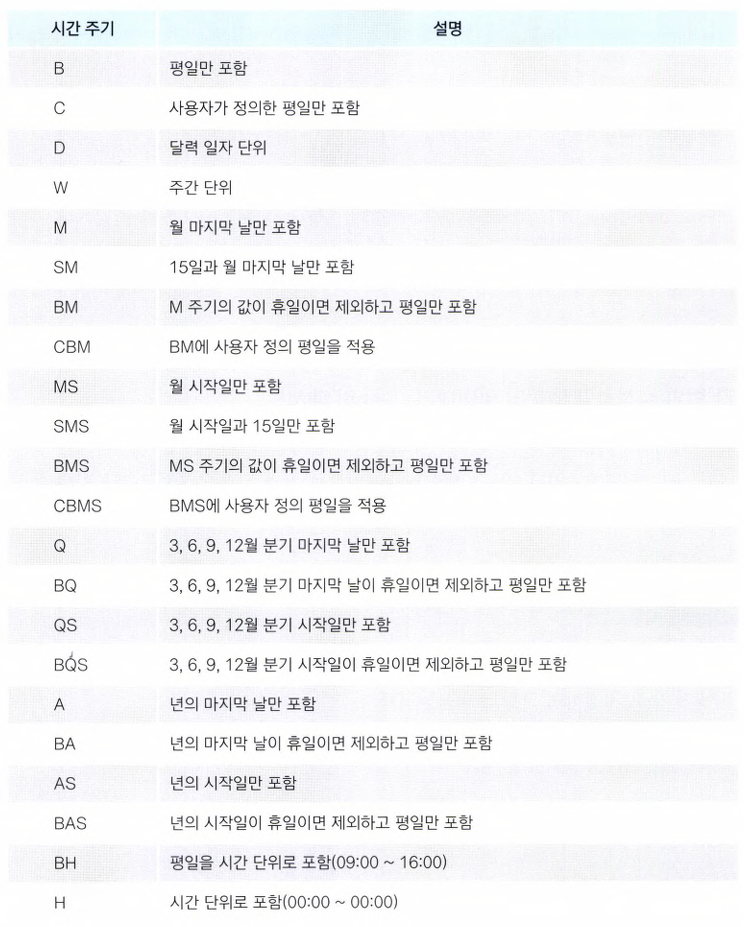
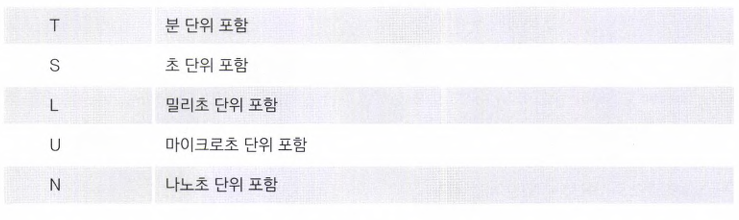

**< 시간 범위 수정하고 데이터 밀어내기 - shift 메서드 >**
- 만약 나라별로 에볼라의 확산 속도를 비교하려면 발생하기 시작한 날짜를 옮기는 것이 good
-  아래부터 ebola 데이터프레임으로 그래프를 그려보고 확산 속도를 비교하는 데에 생기는 문제점과 해결 방안 알아볼 예정

**에볼라의 확산 속도 비교하기**

1. ebola 데이터프레임의 Date 열을 인덱스로 지정한 다음, X축을 Date 열로, Y축을 사망자 수로 지정해 그린 그래프

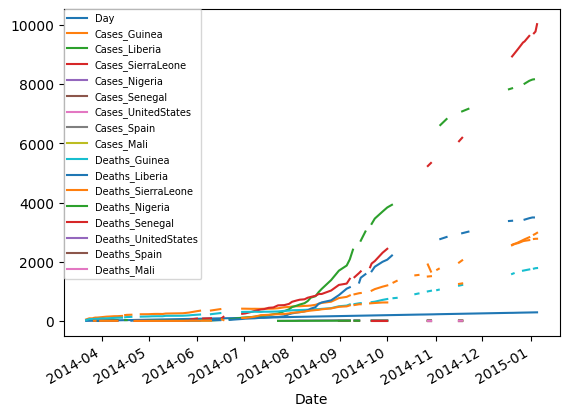

In [119]:
ebola.index = ebola['Date']
fig, ax = plt.subplots()
ax = ebola.iloc[0:, 1:].plot(ax=ax)   # ax=ax 내가 준비한 ax에 그림을 그리라는 뜻
ax.legend(fontsize=7, loc=2, borderaxespad=0.)
plt.show()

- 과정 1 그래프는 각 나라의 에볼라 발병일이 달라 그래프가 그려지기 시작한 지점이 다름
2. 각 나라의 발병일을 가장 처음 에볼라가 발병한 Guinea와 동일한 위치로 옮겨야 나라별 에볼라의 확산 속도를 제대로 비교할 수 있음

In [120]:
ebola_sub = ebola[['Day', 'Cases_Guinea', 'Cases_Liberia']]
print(ebola_sub.tail(10))

            Day  Cases_Guinea  Cases_Liberia
Date                                        
2014-04-04   13         143.0           18.0
2014-04-01   10         127.0            8.0
2014-03-31    9         122.0            8.0
2014-03-29    7         112.0            7.0
2014-03-28    6         112.0            3.0
2014-03-27    5         103.0            8.0
2014-03-26    4          86.0            NaN
2014-03-25    3          86.0            NaN
2014-03-24    2          86.0            NaN
2014-03-22    0          49.0            NaN


3. 아래 코드는 Date 열의 자료형을 datetime 오브젝트로 변환하여 ebola 데이터프레임을 다시 생성한 것임, 하지만 중간에 아예 날짜가 없는 데이터도 있기에 이 데이터도 포함시켜 확산 속도를 비교해야 함

In [121]:
ebola = pd.read_csv('/content/drive/MyDrive/ESAA_datetime/country_timeseries.csv', parse_dates = ['Date'])

In [122]:
print(ebola.head().iloc[:,:5])
print(ebola.tail().iloc[:,:5])

        Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone
0 2015-01-05  289        2776.0            NaN            10030.0
1 2015-01-04  288        2775.0            NaN             9780.0
2 2015-01-03  287        2769.0         8166.0             9722.0
3 2015-01-02  286           NaN         8157.0                NaN
4 2014-12-31  284        2730.0         8115.0             9633.0
          Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone
117 2014-03-27    5         103.0            8.0                6.0
118 2014-03-26    4          86.0            NaN                NaN
119 2014-03-25    3          86.0            NaN                NaN
120 2014-03-24    2          86.0            NaN                NaN
121 2014-03-22    0          49.0            NaN                NaN


4. 아래는 Date 열을 인덱스로 지정한 다음 ebola 데이터프레임의 Date 열의 최댓값과 최솟값으로 시간 범위를 생성해 new_idx에 저장한 것
- 이렇게 하면 날짜가 아예 없던 데이터의 인덱스 생성 가능

In [123]:
ebola.index = ebola['Date']
new_idx = pd.date_range(ebola.index.min(), ebola.index.max())

- new_idx를 살펴보면 ebola 데이터 집합에 있는 시간 순서와 반대로 생성되어 있음
5. 아래는 시간 순서를 맞추기 위해 reserved 메서드를 사용해 인덱스를 반대로 뒤집은 것

In [124]:
print(new_idx)

DatetimeIndex(['2014-03-22', '2014-03-23', '2014-03-24', '2014-03-25',
               '2014-03-26', '2014-03-27', '2014-03-28', '2014-03-29',
               '2014-03-30', '2014-03-31',
               ...
               '2014-12-27', '2014-12-28', '2014-12-29', '2014-12-30',
               '2014-12-31', '2015-01-01', '2015-01-02', '2015-01-03',
               '2015-01-04', '2015-01-05'],
              dtype='datetime64[ns]', length=290, freq='D')


In [125]:
new_idx = reversed(new_idx)
print(new_idx)

6. 아래는 reindex 메서드를 사용해 새로 생성한 인덱스(new_idx)를 새로운 인덱스로 지정한 것
- 그러면 2015년 01월 01일 데이터와 같은 ebola 데이터프레임에 아예 없던 날짜가 추가됨

In [126]:
ebola = ebola.reindex(new_idx)
print(ebola.head().iloc[:,:5])

                 Date    Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone
Date                                                                        
2015-01-05 2015-01-05  289.0        2776.0            NaN            10030.0
2015-01-04 2015-01-04  288.0        2775.0            NaN             9780.0
2015-01-03 2015-01-03  287.0        2769.0         8166.0             9722.0
2015-01-02 2015-01-02  286.0           NaN         8157.0                NaN
2015-01-01        NaT    NaN           NaN            NaN                NaN


7. 아래는 last_valid_index, first_valid_index 메서드를 사용해 각 나라의 에볼라 발병일을 구한 것
- 각각의 메서드는 유효한 값이 있는 첫번째와 마지막 인덱스 반환

In [127]:
last_valid = ebola.apply(pd.Series.last_valid_index)
print(last_valid)

Date                  2014-03-22
Day                   2014-03-22
Cases_Guinea          2014-03-22
Cases_Liberia         2014-03-27
Cases_SierraLeone     2014-03-27
Cases_Nigeria         2014-07-23
Cases_Senegal         2014-08-31
Cases_UnitedStates    2014-10-01
Cases_Spain           2014-10-08
Cases_Mali            2014-10-22
Deaths_Guinea         2014-03-22
Deaths_Liberia        2014-03-27
Deaths_SierraLeone    2014-03-27
Deaths_Nigeria        2014-07-23
Deaths_Senegal        2014-09-07
Deaths_UnitedStates   2014-10-01
Deaths_Spain          2014-10-08
Deaths_Mali           2014-10-22
dtype: datetime64[ns]


In [128]:
first_valid = ebola.apply(pd.Series.first_valid_index)
print(first_valid)

Date                  2015-01-05
Day                   2015-01-05
Cases_Guinea          2015-01-05
Cases_Liberia         2015-01-03
Cases_SierraLeone     2015-01-05
Cases_Nigeria         2014-12-07
Cases_Senegal         2014-12-07
Cases_UnitedStates    2014-12-07
Cases_Spain           2014-12-07
Cases_Mali            2014-12-07
Deaths_Guinea         2015-01-05
Deaths_Liberia        2015-01-03
Deaths_SierraLeone    2015-01-05
Deaths_Nigeria        2014-12-07
Deaths_Senegal        2014-12-07
Deaths_UnitedStates   2014-12-07
Deaths_Spain          2014-12-07
Deaths_Mali           2014-12-07
dtype: datetime64[ns]


8. 각 나라의 에볼라 발병일을 동일한 출발선으로 옮기려면 에볼라가 가장 처음 발병한 날인 earliest_date에서 각 나라의 에볼라 발병일을 뺀 만큼(shift_values)만 옮기면 됨

In [129]:
earliest_date = ebola.index.min()
print(earliest_date)

2014-03-22 00:00:00


In [130]:
shift_values = last_valid - earliest_date
print(shift_values)

Date                    0 days
Day                     0 days
Cases_Guinea            0 days
Cases_Liberia           5 days
Cases_SierraLeone       5 days
Cases_Nigeria         123 days
Cases_Senegal         162 days
Cases_UnitedStates    193 days
Cases_Spain           200 days
Cases_Mali            214 days
Deaths_Guinea           0 days
Deaths_Liberia          5 days
Deaths_SierraLeone      5 days
Deaths_Nigeria        123 days
Deaths_Senegal        169 days
Deaths_UnitedStates   193 days
Deaths_Spain          200 days
Deaths_Mali           214 days
dtype: timedelta64[ns]


9. 아래는 shift 메서드를 사용하여 모든 열의 값을 shift_values 값만큼 옮긴 것
- shift 메서드는 인잣값만큼 데이터를 밀어내는 메서드

In [131]:
ebola_dict = {}   # 빈 딕셔너리를 만듦

for idx, col in enumerate(ebola):   # 열의 이름을 인덱스와 함께 꺼내고,
  d = shift_values[idx].days        # shift day 값만큼의 날짜를 d에 저장
  shifted = ebola[col].shift(d)     # shift 메서드를 사용해 ebola 열의 데이터를 d만큼 밀어냄 (lag)
  ebola_dict[col] = shifted         # 밀어낸 데이터를 빈 딕셔너리의 열에 넣음

/tmp/ipython-input-779895505.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  d = shift_values[idx].days        # shift day 값만큼의 날짜를 d에 저장


- ebola_dict에는 시간을 다시 설정한 데이터가 딕셔너리 형태로 저장되어 있음
10. 다음은 DataFrame 메서드를 사용하여 ebola_dict의 값을 데이터프레임으로 변환한 것

In [132]:
ebola_shift = pd.DataFrame(ebola_dict)

11. 이제 에볼라 최초 발병일을 기준으로 모든 데이터가 옮겨짐

In [133]:
print(ebola_shift.tail())

                 Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone  \
Date                                                                         
2014-03-26 2014-03-26  4.0          86.0            8.0                2.0   
2014-03-25 2014-03-25  3.0          86.0            NaN                NaN   
2014-03-24 2014-03-24  2.0          86.0            7.0                NaN   
2014-03-23        NaT  NaN           NaN            3.0                2.0   
2014-03-22 2014-03-22  0.0          49.0            8.0                6.0   

            Cases_Nigeria  Cases_Senegal  Cases_UnitedStates  Cases_Spain  \
Date                                                                        
2014-03-26            1.0            NaN                 1.0          1.0   
2014-03-25            NaN            NaN                 NaN          NaN   
2014-03-24            NaN            NaN                 NaN          NaN   
2014-03-23            NaN            NaN                 NaN        

12. 마지막으로 인덱스를 Day 열로 지정하고 그래프에 필요없는 Date, Day 열은 삭제

In [134]:
ebola_shift.index = ebola_shift['Day']
ebola_shift = ebola_shift.drop(['Date', 'Day'], axis=1)
print(ebola_shift.tail( ))

     Cases_Guinea  Cases_Liberia  Cases_SierraLeone  Cases_Nigeria  \
Day                                                                  
4.0          86.0            8.0                2.0            1.0   
3.0          86.0            NaN                NaN            NaN   
2.0          86.0            7.0                NaN            NaN   
NaN           NaN            3.0                2.0            NaN   
0.0          49.0            8.0                6.0            0.0   

     Cases_Senegal  Cases_UnitedStates  Cases_Spain  Cases_Mali  \
Day                                                               
4.0            NaN                 1.0          1.0         NaN   
3.0            NaN                 NaN          NaN         NaN   
2.0            NaN                 NaN          NaN         NaN   
NaN            NaN                 NaN          NaN         NaN   
0.0            1.0                 1.0          1.0         1.0   

     Deaths_Guinea  Deaths_Liberia  Dea

13. 그래프 그리기

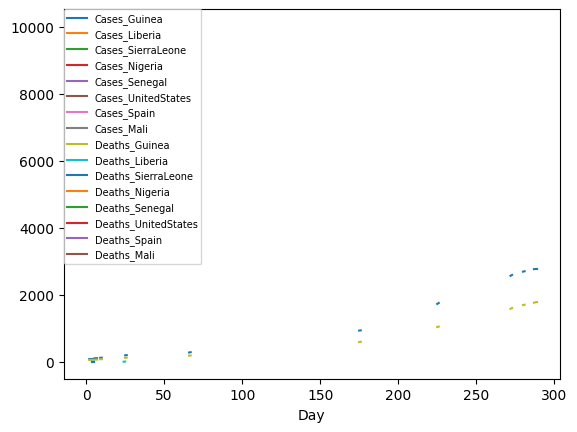

In [135]:
fig, ax = plt.subplots()
ax = ebola_shift.iloc[:, :].plot(ax=ax)
ax.legend(fontsize=7, loc=2, borderaxespad=0.)
plt.show()